# Regression
CMP5101 notes (Tevfik Aytekin)

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
%matplotlib inline

# IMPORTANT: You need to download the following file to your computer from here:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
train = pd.read_csv("../datasets/house_prices/train.csv")

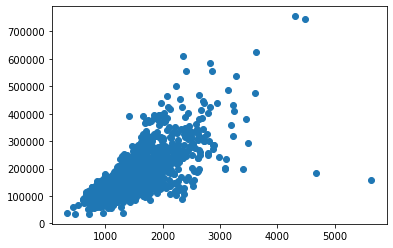

In [261]:
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"])

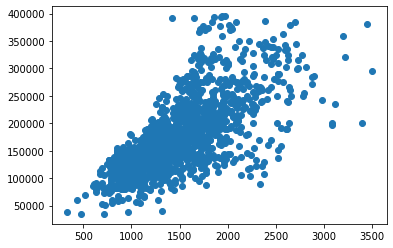

In [262]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
plt.scatter(train2.loc[:,"GrLivArea"], train2.loc[:,"SalePrice"])

(257, 1) (257,)
(29, 1) (29,)


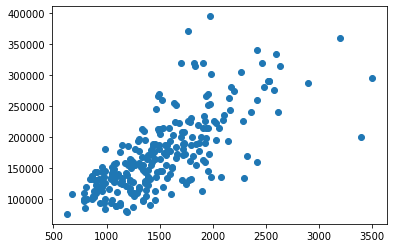

In [263]:
# Take a small sample of the data in order to work with nicer diagrams.
# Make a test / train split

train2 = train2.sample(frac=0.2)
X = train2[['GrLivArea']]
y = train2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

In [264]:
# fit a linear model
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

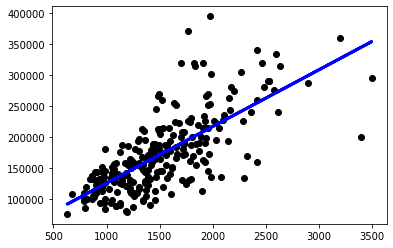

In [265]:
#Plot regression line on training data
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

In [266]:
# Show the intercept and the coefficient of the model (which is a line)
print (model.intercept_)
print (model.coef_)

33481.92609924395
[91.71694286]


#### Can we interpret the above coefficient as increase in price per square feet?

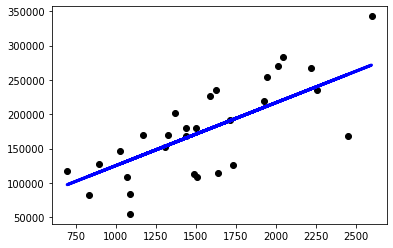

In [267]:
#Plot regression line on test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, test_predictions, color='blue', linewidth=3)

In [268]:
# training and test set mean absolute error (MAE)
print("Training MAE:", mean_absolute_error(y_train, train_predictions))
# or
print(np.mean(np.abs(y_train - train_predictions)))

print("Test MAE:", mean_absolute_error(y_test, test_predictions))


Training MAE: 30605.036846327024
30605.036846327028
Test MAE: 36678.93617780147


In [269]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))

Test MAPE: 26.696154467148297


In [270]:
print("r-squared:", model.score(X_test, y_test))

r-squared: 0.5653683704640238


## The Coefficient of Determination, r-squared ($r^2$)

$r^2$, is the percentage of the dependent variable variation that a model explains. What does this mean? Baseline model predicts always the mean value (a horizontal line). We can find the SSE of the baseline model (call it MSSE). Find the SSE of the regression line (call it RSSE). 

$$r^2 = \frac{(MSSE - RSSE)}{MSSE}$$ 

$r^2$ compares the performance of the model with respect to baseline. If it is 0 it means the model performance is as bad as the baseline, if it is 1 it means that the model performance is perfect. 

What is the range of values can $r^2$ take? Can it be a negative value?

More information is [here](https://onlinecourses.science.psu.edu/stat501/node/255/)

$r$ in $r^2$ refers to Pearson's correlation coefficient. Relation between $r$ and $r^2$ is [here](http://www.win-vector.com/blog/2011/11/correlation-and-r-squared/)


In [271]:
# baseline - predict always the mean SalePrice value

mean_sales_price = y_train.mean()
mean_array = np.ones(y_test.size)*mean_sales_price
print("Baseline (mean) MAE:", mean_absolute_error(y_test, mean_array))
print("Baseline (mean) MAPE:", mean_absolute_percentage_error(y_test, mean_array))


Baseline (mean) MAE: 54849.00281765732
Baseline (mean) MAPE: 38.764867538533


In [272]:
# Scores according to Kaggle challenge metric
from sklearn.metrics import mean_squared_log_error


def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));

print("Test Kaggle-score:", kaggle_score(y_test, test_predictions))
print("Baseline (mean) Kaggle-score:", kaggle_score(y_test,mean_array))


Test Kaggle-score: 0.29939252172841896
Baseline (mean) Kaggle-score: 0.420948624222018


In [273]:
# Prediction with two input variables

X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']

X.head(5)

,GrLivArea,BedroomAbvGr
0,1710,3
1,1262,3
2,1786,3
3,1717,3
4,2198,4


In [274]:
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['GrLivArea','Bedroom'], model.coef_)).T
print(combined)

Test MAE: 38694.6581258604
Test Kaggle-Score: 0.27880157911567377
Test MAPE: 23.132845554173077
Intercept: 62233.95936611158
[['GrLivArea' '129.2205797555536']
 ['Bedroom' '-27074.167485492828']]


### The coefficient of Bedroom is negative! Does increase in the number of bedrooms negatively effect house price?

In [276]:
# Prediction with only Bedroom

X = train.loc[:,['BedroomAbvGr']]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['Bedroom'], model.coef_)).T
print(combined)

Test MAE: 55575.68258587714
Test Kaggle-Score: 0.39820863632330505
Test MAPE: 35.09251486741646
Intercept: 137995.617438972
[['Bedroom' '15004.558966993023']]


In [284]:
# Run linear regression with top correlated 10 attributes with SalePrice
cors = train.corr(); 
top10 = np.abs(cors.loc[:, "SalePrice"]).sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((top10, model.coef_)).T
print(combined)


Test MAE: 23918.73682286369
Test Kaggle-Score: 0.20723273154553445
Test MAPE: 14.055554928508665
Intercept: -1170051.0698922076
[['OverallQual' '20028.271425121187']
 ['GrLivArea' '46.97691108254886']
 ['GarageCars' '11651.533122721205']
 ['GarageArea' '12.343249038108928']
 ['TotalBsmtSF' '19.786251878784164']
 ['1stFlrSF' '14.099924196567967']
 ['FullBath' '-6340.875057738981']
 ['TotRmsAbvGrd' '595.4434389509514']
 ['YearBuilt' '248.23094158454376']
 ['YearRemodAdd' '307.5566573673992']]


In [287]:
X.shape

(1460, 288)

In [286]:
# run linear regression with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)

Test MAE: 17568.177243769285
Test Kaggle-Score: 0.17868858967073964
Test MAPE: 10.79308163791702
Intercept: 455090.82641537767
[['MSSubClass' -6.6405740888798075]
 ['LotFrontage' 70.9214685141317]
 ['LotArea' 0.7116049484265972]
 ['OverallQual' 6877.946600857156]
 ['OverallCond' 5802.178931646564]
 ['YearBuilt' 321.0257830319251]
 ['YearRemodAdd' 70.82683266796289]
 ['MasVnrArea' 19.387906844524906]
 ['BsmtFinSF1' 17.187896753068344]
 ['BsmtFinSF2' 7.786072320761377]
 ['BsmtUnfSF' -0.6433572839553676]
 ['TotalBsmtSF' 24.330629612471967]
 ['1stFlrSF' 15.011679581391036]
 ['2ndFlrSF' 38.258001911810425]
 ['LowQualFinSF' -29.9306481227964]
 ['GrLivArea' 23.339046022906587]
 ['BsmtFullBath' 2141.0106424807514]
 ['BsmtHalfBath' -1151.3206290856176]
 ['FullBath' 4226.069682747573]
 ['HalfBath' 1759.7687975734057]
 ['BedroomAbvGr' -3526.420180887325]
 ['KitchenAbvGr' -9932.80731718977]
 ['TotRmsAbvGrd' 2241.6320836638083]
 ['Fireplaces' 7130.840870904997]
 ['GarageYrBlt' -1.5145028309076451]


[Dummy encoding](https://github.com/tevfikaytekin/data_science/blob/master/collin_dummy.ipynb)

In [288]:
# Cross validation with a single line
X = X.fillna(X.mean()) #!!! Test data is used in the mean
result = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv = 5)
print(result)


[-19046.63011546 -18850.54099706 -19965.80441316 -15996.68770613
 -20272.26396749]


### Scaling (or Standardization)

#### min-max scaling

$$
x_i = \frac{x_i - x_{min}}{x_{max}-x_{min}}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $x_{min}$ is the minimum and $x_{max}$ is the maximum value in $x$. 

In [289]:
# create a DataFrame 
df = pd.DataFrame([[100, 1990, 100000],
                  [120, 2002, 150000],
                  [90, 2012, 120000]],
                 index = [5, 10,15],
                 columns = ["area","built","price"])
df

,area,built,price
5,100,1990,100000
10,120,2002,150000
15,90,2012,120000


In [290]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df)
print(scaler.data_max_)
print(scaler.data_min_)

[1.200e+02 2.012e+03 1.500e+05]
[9.00e+01 1.99e+03 1.00e+05]


In [291]:
print(scaler.transform(df))

[[0.33333333 0.         0.        ]
 [1.         0.54545455 1.        ]
 [0.         1.         0.4       ]]


#### Standard scaling

$$
x_i = \frac{x_i - \bar{x}}{s_x}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $\bar{x}$ is the mean of $x$ and $s_x$ is the std of $x$. 

In [292]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df)
print(scaler.transform(df))

[[-0.26726124 -1.26012384 -1.13554995]
 [ 1.33630621  0.07412493  1.29777137]
 [-1.06904497  1.18599891 -0.16222142]]


### Example

In [295]:
X = train.loc[:,['LotArea','OverallQual']]
y = train.loc[:,'SalePrice']
#X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test_scaled = scaler.transform(X_test)

lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)
test_predictions = model.predict(X_test_scaled)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, np.abs(test_predictions)))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print(X_train_scaled)

Test MAE: 31533.257332987243
Test Kaggle-score: 0.2306226544224694
Test MAPE: 17.93149431926493
[[0.03365351 0.44444444]
 [0.0620954  0.55555556]
 [0.03879502 0.33333333]
 ...
 [0.02252915 0.44444444]
 [0.03774335 0.77777778]
 [0.03075089 0.33333333]]


### Overfitting

(38, 1) (38,)
(5, 1) (5,)


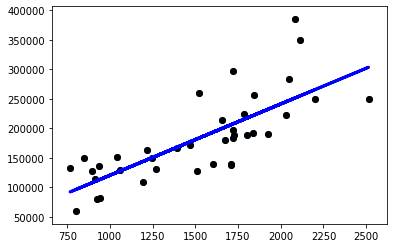

In [296]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train3 = train2.sample(frac=0.03)
X = train3[['GrLivArea']]
y = train3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

model_slr = linear_model.LinearRegression()
model = model_slr.fit(X_train, y_train)
train_predictions = model_slr.predict(X_train)
test_predictions = model_slr.predict(X_test)

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

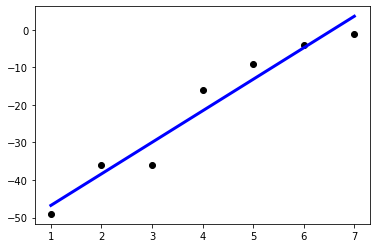

In [299]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)

model = linear_model.LinearRegression()
model = model.fit(X, y)

train_predictions = model.predict(X)

plt.scatter(X, y,  color='black')
plt.plot(X, train_predictions, color='blue', linewidth=3)



[[ 7 49]
 [ 6 36]
 [ 5 25]
 [ 4 16]
 [ 3  9]
 [ 2  4]
 [ 1  1]]
[13.25       -0.60714286]
-62.4285714285714


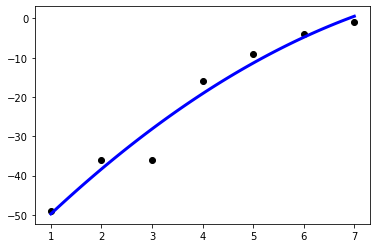

In [302]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2]
model = linear_model.LinearRegression()
model = model.fit(X, y)
X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(X)
print(model.coef_)
print(model.intercept_)

[ 3.92548440e+00  7.13912845e+00  6.47138798e+00 -4.98518482e-01
 -6.85905697e+00  4.26587424e+00 -1.05595717e+00  1.19355760e-01
 -5.11404786e-03]
-62.50258416958344


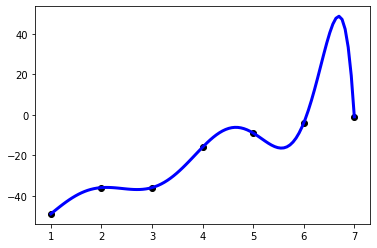

In [305]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.LinearRegression()
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### Ridge Regression

[ 3.07391854e-01  5.77397076e-01  5.77329049e-01  1.04592385e-01
 -4.04882677e-01  2.54198846e-01 -6.78184427e-02  8.18085019e-03
 -3.67851928e-04]
-47.319761762545696


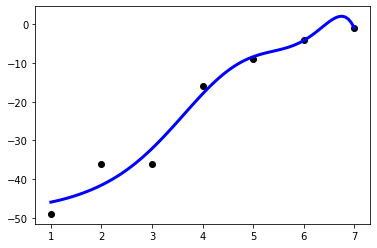

In [306]:
from sklearn.linear_model import Ridge
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.Ridge(alpha=5)
# play with the value of alpha and see its effect.
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### PolynomialFeatures method in Python

In [307]:
from sklearn.preprocessing import PolynomialFeatures
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.fillna(X.mean())
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
print(X);

Test MAE: 35748.47565450663
Test Kaggle-Score: 0.26668101197294547
Test MAPE: 21.954163173864465
Intercept: -34460.75163043666
[[1.710000e+03 3.000000e+00 2.924100e+06 5.130000e+03 9.000000e+00]
 [1.262000e+03 3.000000e+00 1.592644e+06 3.786000e+03 9.000000e+00]
 [1.786000e+03 3.000000e+00 3.189796e+06 5.358000e+03 9.000000e+00]
 ...
 [2.340000e+03 4.000000e+00 5.475600e+06 9.360000e+03 1.600000e+01]
 [1.078000e+03 2.000000e+00 1.162084e+06 2.156000e+03 4.000000e+00]
 [1.256000e+03 3.000000e+00 1.577536e+06 3.768000e+03 9.000000e+00]]


### Batch Gradient Descent Implementation

In [308]:
def cost(X,y,w,b):
    return np.sum(np.abs((np.dot(X,w) + b) - y))/X.shape[0]

In [317]:
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.to_numpy()
y = y.to_numpy()
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [318]:
import copy

n_features = 2
learning_rate = 0.3
n_iter=1000
m = X.shape[0]
w = np.random.rand(n_features,1)
b = np.random.rand()
y = y.reshape(y.size, 1)
cost_array = []

for iter in range(n_iter):
    c = cost(X,y,w,b)
    cost_array.append(c) 
    print(c)
    w_back = copy.deepcopy(w)
    for j in range(n_features): 
        dw = 0;
        db = 0;
        for i in range(m):
            dw=dw+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))*X[i,j]
        w[j] = w_back[j] + learning_rate * dw/m;
        
    for i in range(m):
        db=db+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))
    b = b + learning_rate * db/m;

180920.61423671723
116681.90580815791
78141.25295482074
60034.47947892755
54247.74808973401
52869.74480429051
52914.42028789881
53201.43938711306
53526.530770841
53782.76118540402
53953.190292370164
54053.993164039486
54099.374097437954
54105.46639194786
54084.99734146957
54046.85628324876
53997.37490298809
53940.72953105926
53879.50136910489
53815.74160327821
53750.16792671676
53683.58294838348
53616.397934504974
53549.11751840689
53481.77355118669
53414.47822323183
53347.26691151002
53280.404612857994
53213.941637513344
53147.631487068415
53081.48513395509
53015.51135795155
52949.807205474295
52884.287543812
52818.95062449962
52753.797443880336
52688.828422743405
52624.08697975578
52559.734218837904
52495.58075431529
52431.6719022057
52367.95823976619
52304.52104680489
52241.264366428084
52178.18761875779
52115.340278831805
52052.74608378923
51990.329682453936
51928.09047911996
51866.02787834679
51804.15474989249
51742.70965282408
51681.479404972146
51620.422067574946
51559.537058392

39031.97158538941
39018.82314016675
39005.78454621735
38992.816835668025
38979.94490268783
38967.096746703945
38954.35208073471
38941.63522118608
38928.941806075185
38916.27178135671
38903.62509314308
38891.02637193529
38878.472503386496
38865.951119277495
38853.50892332037
38841.08936894615
38828.71995489411
38816.4383808017
38804.21422699446
38792.0229219221
38779.86660872088
38767.80741708915
38755.769986414045
38743.75898849247
38731.777677977465
38719.817963255984
38707.87979605449
38695.96312823671
38684.06791180309
38672.244122686316
38660.471810874136
38648.72064862185
38636.99058887142
38625.32441268228
38613.689356904884
38602.07514742473
38590.48173803685
38578.909597141515
38567.368554630026
38555.84815863307
38544.34836348732
38532.91092261904
38521.61858112595
38510.34682293565
38499.10868904775
38487.967188812174
38476.90499064637
38465.889666444076
38454.893903336444
38443.91765851867
38432.96088930529
38422.02355312975
38411.10560754409
38400.25362638471
38389.44698093

36229.23521713454
36226.81459376108
36224.39753481981
36222.01434899835
36219.664297027266
36217.33681373928
36215.02928418863
36212.743434312346
36210.46095588669
36208.18184372307
36205.93040290843
36203.70816394776
36201.48919386738
36199.28679800469
36197.10571181317
36194.92782800781
36192.75314171594
36190.581648073
36188.414433557635
36186.25248797704
36184.093716591684
36181.938114572156
36179.785677097025
36177.63639935287
36175.49027653422
36173.34730384355
36171.20747649129
36169.07078969577
36166.94901762073
36164.85350849586
36162.761068317355
36160.67169244563
36158.59414075867
36156.52192927496
36154.45275104551
36152.400181376324
36150.371592596486
36148.36425898114
36146.35985454504
36144.35837490087
36142.35981566836
36140.38620791511
36138.43996079653
36136.51911156797
36134.60376019408
36132.69118897935
36130.781393817
36128.90638550196
36127.07796966642
36125.262414850375
36123.44948913699
36121.639188666726
36119.83150958597
36118.02644804695
36116.23304290525
361

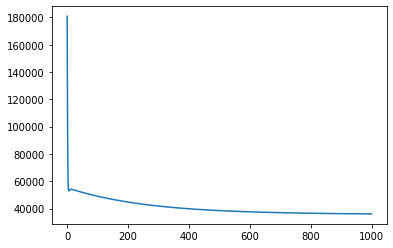

In [319]:
plt.plot(cost_array)

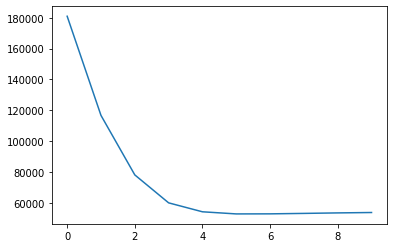

In [320]:
plt.plot(cost_array[:10])